In [5]:
source("common.R")

levels <- c("Activity not limited", "Activity limited a little", "Activity limited a lot")

df_all <-
  read_csv("data/tidy_ons_longcovid.csv", col_types = "ccfd")%>%
  filter(Domain=="Duration since first (suspected) coronavirus infection")%>%
  filter(Group!="Unknown duration")%>%
  mutate(`Impact on daily activity` = as.factor(`Impact on daily activity`))%>%
  mutate(`Impact on daily activity` = factor(`Impact on daily activity`, levels = levels))%>%
  mutate(middle = case_when(Group=="0 to <12 weeks"~8,
                         Group=="12 to <26 weeks"~19,
                         Group=="26 to <39 weeks"~33,
                         Group=="39 to <52 weeks"~45,
                         Group=="52 to <78 weeks"~65,
                         Group==">= 52 weeks"~65,
                         Group=="78 to <104 weeks"~86,
                         Group=="104+ weeks"~117,
                        T~NA))%>%
  select(-Domain, -filename)

df_all%>%
  head

Impact on daily activity,Group,Estimate,Lower 95% confidence limit,Upper 95% confidence limit,Date,middle
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
Activity not limited,0 to <12 weeks,17,13,21,2023-03-05,8
Activity not limited,12 to <26 weeks,25,20,31,2023-03-05,19
Activity not limited,26 to <39 weeks,28,23,33,2023-03-05,33
Activity not limited,39 to <52 weeks,32,27,38,2023-03-05,45
Activity not limited,52 to <78 weeks,104,93,116,2023-03-05,65
Activity not limited,78 to <104 weeks,30,23,36,2023-03-05,86


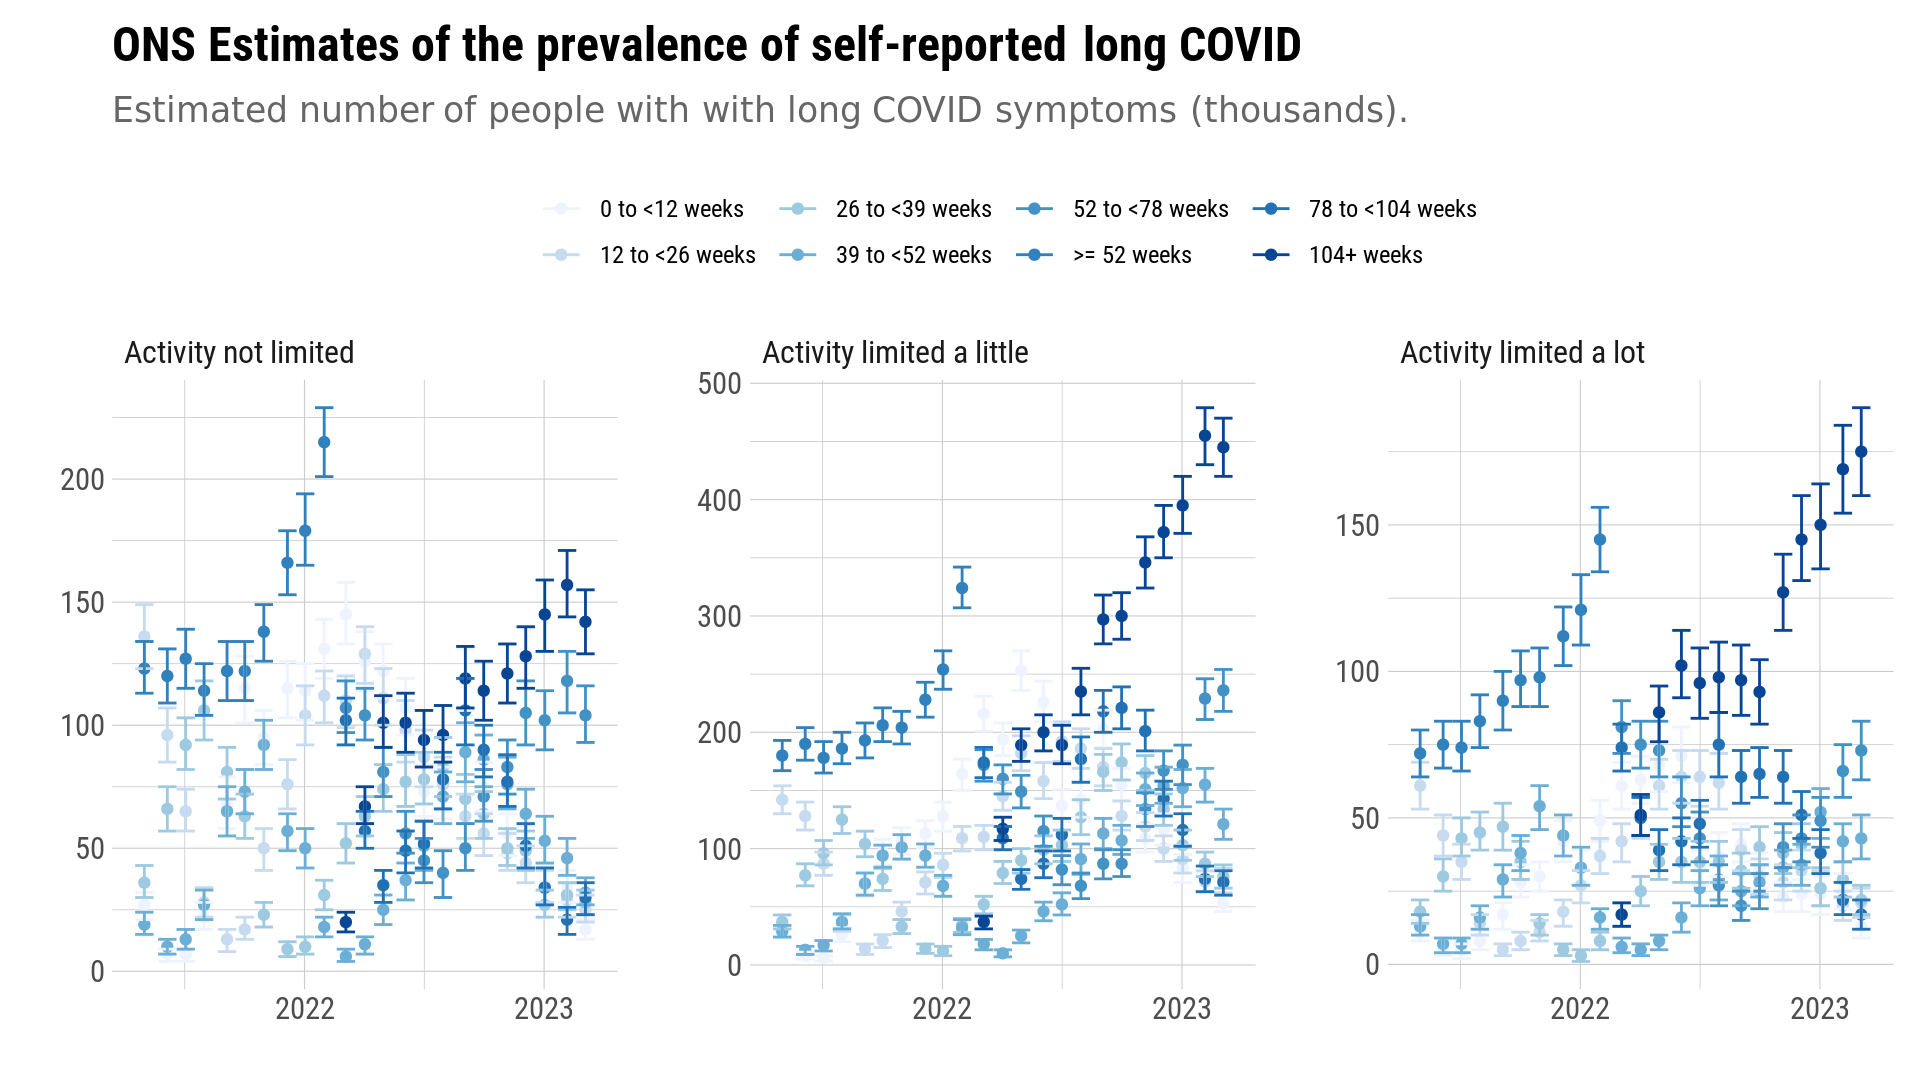

In [6]:
s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df_all%>%
  ggplot(aes(x = Date, y = Estimate, color = reorder(Group, middle))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Estimated number of people with with long COVID symptoms (thousands).",
       color = "", x = "", y = "") +
  geom_point() +
  geom_errorbar(aes(ymin = `Lower 95% confidence limit`,
                    ymax = `Upper 95% confidence limit`), width=28) +
  scale_color_manual(values = pal) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_incidence_by_date")


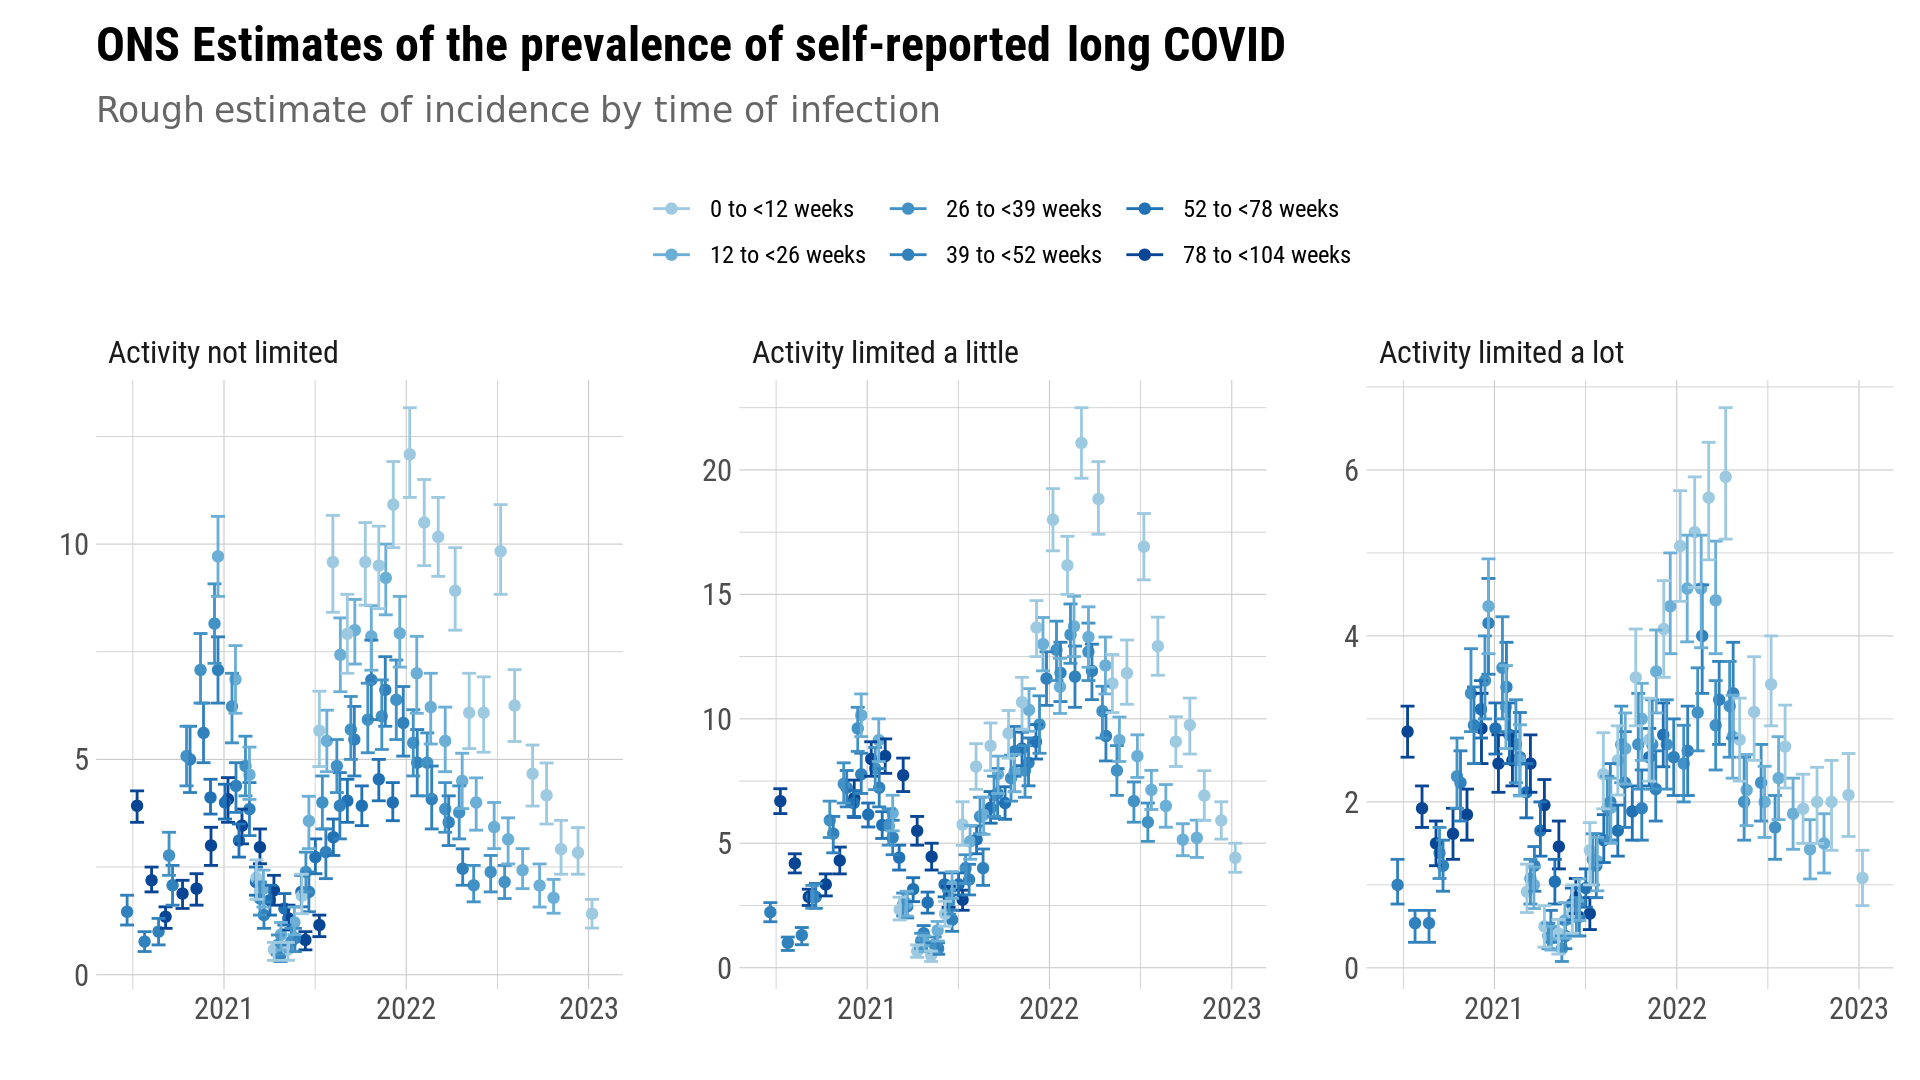

In [7]:

s = 1.25
options(repr.plot.width = s*8, repr.plot.height = s*4.5, repr.plot.res = 240/s)

df_all%>%
  filter(!Group %in% c(">= 52 weeks", "104+ weeks"))%>%
  mutate(duration = case_when(Group=="0 to <12 weeks"~12,
                         Group=="12 to <26 weeks"~14,
                         Group=="26 to <39 weeks"~13,
                         Group=="39 to <52 weeks"~13,
                         Group=="52 to <78 weeks"~26,
                         Group=="78 to <104 weeks"~26,
                        T~NA))%>%
  mutate(InfectionDate = Date-middle*7)%>%
  ggplot(aes(x = InfectionDate, y = Estimate/duration, color = reorder(Group, middle))) + 
  labs(title = "ONS Estimates of the prevalence of self-reported long COVID",
       subtitle = "Rough estimate of incidence by time of infection",
       color = "", x = "", y = "") +
  geom_point() +
  geom_errorbar(aes(ymin = `Lower 95% confidence limit`/duration,
                    ymax = `Upper 95% confidence limit`/duration), width=28) +
  scale_color_manual(values = tail(pal, 6)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  scale_y_continuous(labels = scales::comma) +
  facet_wrap(~`Impact on daily activity`, ncol = 3, scale = "free_y") +
  theme(legend.position  = "top") +
  savePlot("ONS_LC_incidence_by_time_of_infection")
